<img src="https://www.dropbox.com/s/l93ecugg1jbtjiw/fga.png?raw=1" width="1200" height="400">
<ul>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/3) Atividade Prática Avaliativa
    Entrega da Atividade 27/07/2022 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 10 (quinze) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (cinquenta) ativos mais líquidos; </li><p></p>
    <li> Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis); </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa; </li><p></p>
    <li> Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados. </li>
</ol>
</div>


### Questão 1: 

# Extração
As ações utilizadas para a análise foram extraidas de forma geral de um próprio site da b3 que pode ser encontrado <a href="https://www.b3.com.br/pt_br/market-data-e-indices/indices/acoes-por-indice/" target="_top">aqui</a>. Para a reprodução do método utilizado, basta baixar a planilha, e efetuar as análises conforme demonstrado abaixo

In [99]:
!pip install pandas
!pip install investpy
!pip install seaborn
!pip install lxml
!pip install html5lib
!pip install tqdm
!pip install pandas_datareader

You should consider upgrading via the 'D:\Users\abner\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Users\abner\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Users\abner\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Users\abner\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Users\abner\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Users\abner\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 109.5/109.5 KB 1.6 MB/s eta 0:00:00


You should consider upgrading via the 'D:\Users\abner\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

In [102]:
stock_based_on_index = pd.read_csv('AcoesPorIndice.csv',sep=";")
stock_based_on_index.head()

,Empresa,Codigo,indices dos quais participa
0,3M,MMMC34,BDRX
1,3R PETROLEUM,RRRP3,"IBOV,IBRA,IBXX,IGCT,IGCX,IGNM,ITAG,IVBX,SMLL"
2,3TENTOS,TTEN3,"AGFS,IBRA,ICON,IGCT,IGCX,IGNM,ITAG,SMLL"
3,AB INBEV,ABUD34,BDRX
4,ABB LTD,A1BB34,BDRX


In [103]:
# Retira a coluna de empresa do dataframe
stock_based_on_index.drop('Empresa', axis=1, inplace=True)
stock_based_on_index.head(20)

,Codigo,indices dos quais participa
0,MMMC34,BDRX
1,RRRP3,"IBOV,IBRA,IBXX,IGCT,IGCX,IGNM,ITAG,IVBX,SMLL"
2,TTEN3,"AGFS,IBRA,ICON,IGCT,IGCX,IGNM,ITAG,SMLL"
3,ABUD34,BDRX
4,A1BB34,BDRX
5,ABTT34,BDRX
6,ABBV34,BDRX
7,ABCB4,"IBRA,IDIV,IFNC,IGCT,IGCX,ITAG,SMLL"
8,ACNB34,BDRX
9,ATVI34,BDRX


# Selecionando os codigos dos ativos dos 5 indices com maior liquidez

In [104]:
import operator
dic = {}
myList = []
for i in stock_based_on_index['indices dos quais participa']:
    for j in i.split(","):
        if j in dic.keys():
            dic[j] += 1
        else:
            dic[j] = 1
sorted_d = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
indexes = list(sorted_d)[0:5]


In [105]:
print('Índices filtrados: %s' % indexes)

Índices filtrados: ['BDRX', 'IGCX', 'ITAG', 'IBRA', 'IGCT']


In [111]:
stock_list = []
i = 0
while i != stock_based_on_index.shape[0]:
    if stock_based_on_index['indices dos quais participa'][i] in indexes:
        stock_list.append(stock_based_on_index['Codigo'][i])
    i += 1
stock_list

['MMMC34',
 'ABUD34',
 'A1BB34',
 'ABTT34',
 'ABBV34',
 'ACNB34',
 'ATVI34',
 'ADBE34',
 'A1AP34',
 'A1MD34',
 'A1EG34',
 'A1ES34',
 'AIRB34',
 'A1KA34',
 'A1LB34',
 'A1RE34',
 'BABA34',
 'A1LG34',
 'A1LN34',
 'ALPA3',
 'GOGL34',
 'GOGL35',
 'A1YX34',
 'MOOO34',
 'AMZO34',
 'A2MC34',
 'A1CR34',
 'A1MX34',
 'AALL34',
 'AXPB34',
 'T1OW34',
 'AMGN34',
 'A1UA34',
 'A1PA34',
 'A1IV34',
 'AAPL34',
 'A1MT34',
 'ARMT34',
 'ASML34',
 'A1ZN34',
 'T1AM34',
 'ATTB34',
 'A1UT34',
 'A1TH34',
 'A1VB34',
 'BAHI3',
 'BIDU34',
 'B1SA34',
 'BGIP3',
 'BGIP4',
 'BOAC34',
 'B1CS34',
 'BERK34',
 'BBYY34',
 'B2YN34',
 'B1IL34',
 'BIIB34',
 'BIOM3',
 'B1NT34',
 'BLAK34',
 'S2QU34',
 'BONY34',
 'BOEI34',
 'BKNG34',
 'BOXP34',
 'B1SX34',
 'B1PP34',
 'BMYB34',
 'B1TI34',
 'AVGO34',
 'B1AM34',
 'C1CL34',
 'CATP34',
 'CEDO3',
 'CLSC3',
 'CHCM34',
 'CHVX34',
 'L1FC34',
 'C1HI34',
 'C1IC34',
 'CSCO34',
 'CTGP34',
 'COCA34',
 'C2OI34',
 'COLG34',
 'CMCS34',
 'COPH34',
 'C1TV34',
 'C1GP34',
 'COWC34',
 'CTNM4',
 'COTY3

Agora iremos baixar as cotações das ações que separamos anteriormente

In [112]:
from pandas_datareader import DataReader
from tqdm import tqdm

In [113]:
start_date = '2012-07-01'
final_date = '2022-07-01'

In [114]:
daily_quotes = pd.DataFrame()
daily_volume = pd.DataFrame()
symbols = []
errors = []
for symbol in tqdm(stock_list):
    
    if not symbol.endswith('.SA'):
        symbol_sa = "%s.SA" % symbol
    else:
        symbol_sa = symbol
        
    try:
        df = DataReader(symbol_sa, 'yahoo', start_date, final_date)

        close_price = df["Adj Close"]
        volume = df["Volume"]
        symbols.append(symbol)

        daily_quotes = pd.concat([daily_quotes, close_price], axis=1)
        daily_volume = pd.concat([daily_volume, volume], axis=1)

        daily_quotes.columns = symbols
        daily_volume.columns = symbols
    except:
        errors.append(symbol)
        
print('Não foi possível baixar corretamente as cotações dos seguinte ativos: %s' % errors)

100%|████████████████████████████████████████████████████████████████████████████████| 289/289 [09:33<00:00,  1.98s/it]

Não foi possível baixar corretamente as cotações dos seguinte ativos: ['L1YG34', 'W1BD34']


Erros: 366604.
Ativos com valores vazios: ['ABUD34', 'A1BB34', 'ABBV34', 'ACNB34', 'ATVI34', 'ADBE34', 'A1AP34', 'A1MD34', 'A1EG34', 'A1ES34', 'AIRB34', 'A1KA34', 'A1LB34', 'A1RE34', 'BABA34', 'A1LG34', 'A1LN34', 'GOGL34', 'GOGL35', 'A1YX34', 'MOOO34', 'A2MC34', 'A1CR34', 'A1MX34', 'AALL34', 'T1OW34', 'A1UA34', 'A1PA34', 'A1IV34', 'A1MT34', 'ASML34', 'A1ZN34', 'T1AM34', 'A1UT34', 'A1TH34', 'A1VB34', 'BIDU34', 'B1SA34', 'B1CS34', 'BERK34', 'BBYY34', 'B2YN34', 'B1IL34', 'BIIB34', 'B1NT34', 'BLAK34', 'S2QU34', 'BONY34', 'BKNG34', 'BOXP34', 'B1SX34', 'B1PP34', 'BMYB34', 'B1TI34', 'AVGO34', 'B1AM34', 'C1CL34', 'CHCM34', 'L1FC34', 'C1HI34', 'C1IC34', 'C2OI34', 'CMCS34', 'C1TV34', 'C1GP34', 'COWC34', 'COTY34', 'C1OU34', 'C1SU34', 'CRIP34', 'CVSH34', 'DHER34', 'D1DG34', 'DEEC34', 'DEAI34', 'DBAG34', 'D1VN34', 'D1EX34', 'DEXP4', 'DEOP34', 'F1AN34', 'D1LR34', 'D1OC34', 'DGCO34', 'D1OW34', 'E1TN34', 'E1CO34', 'EAIN34', 'E1OG34', 'EQIX34', 'E1QN34', 'E1QR34', 'E1RI34', 'E1SS34', 'ELCI34', 'F1NI34'

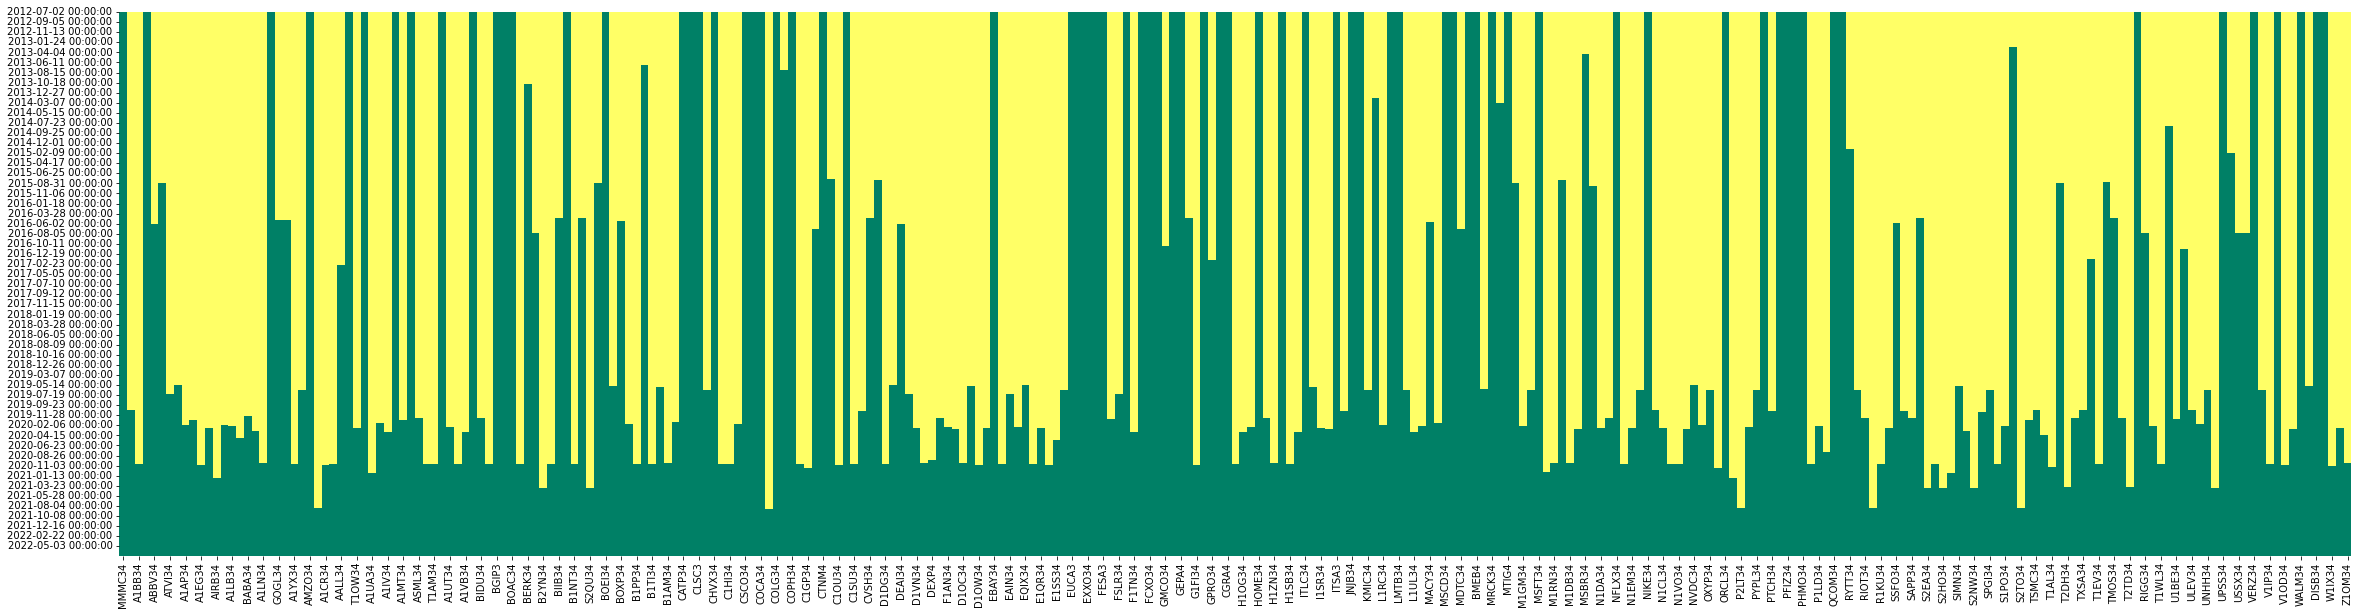

In [117]:
plt.figure(figsize=(40,10))

sns.heatmap(daily_quotes.isnull(),  cbar=False, cmap = 'summer')
columns_with_na = daily_quotes.columns[daily_quotes.isna().any()].tolist()

print("Erros: %s.\nAtivos com valores vazios: %s" % (np.sum(daily_quotes.isnull().sum()), columns_with_na))

In [118]:
valid_stocks_quotes = daily_quotes.dropna(axis=1)
valid_stocks_volume = daily_volume.dropna(axis=1)

Separando agora somente os 30 ativos com maior liquidez

In [119]:
qtd_stocks = 30
high_volume_stocks_sym = valid_stocks_volume.mean().sort_values(ascending=False).head(qtd_stocks).index.tolist()

In [122]:
stock_quotes = valid_stocks_quotes[high_volume_stocks_sym].copy()
stock_quotes

,AMZO34,ITSA3,FRAS3,AAPL34,MSFT34,EUCA4,DISB34,VISA34,BMEB4,HOME34,...,BOAC34,MRCK34,WALM34,PGCO34,PEPB34,NIKE34,ITLC34,RAPT3,ALPA3,MCDC34
2012-07-02,0.146417,4.079167,6.895244,3.580489,0.205528,5.395182,2.176876,0.703354,0.920893,1.229531,...,3.399663,3.584700,5.212872,1.694645,2.355937,1.479987,3.931007,5.374439,7.012277,4.751341
2012-07-03,0.146417,4.152383,6.895244,3.580489,0.205528,5.347294,2.176876,0.703354,0.915379,1.229531,...,3.399663,3.584700,5.212872,1.694645,2.355937,1.479987,3.931007,5.038537,7.228042,4.751341
2012-07-04,0.146417,4.183761,6.895244,3.580489,0.212209,5.307389,2.176876,0.703354,0.896473,1.229531,...,3.399663,4.034449,5.212872,1.687883,2.355937,1.479987,3.964387,5.044757,7.465381,4.644052
2012-07-05,0.146417,4.183761,6.895244,3.768052,0.212209,5.203636,2.176876,0.703354,0.898836,1.229531,...,3.399663,4.034449,5.212872,1.687883,2.355937,1.479987,3.964387,5.187828,7.335923,4.649163
2012-07-06,0.146417,4.044303,6.895244,3.710105,0.207257,5.227579,2.176876,0.703354,0.898836,1.229531,...,3.399663,4.034449,5.212872,1.687883,2.355937,1.479987,3.964387,5.038537,7.335923,4.649163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,3.780000,9.060000,9.842046,73.809998,57.560001,8.090000,33.520000,53.119999,9.970000,52.520000,...,42.020000,61.509998,40.419998,53.330002,57.590000,57.490002,33.560001,8.310000,17.850000,64.169998
2022-06-28,3.580000,9.030000,9.762754,72.330002,56.240002,8.230000,33.500000,52.180000,9.950000,50.880001,...,42.400002,60.660000,40.230000,53.139999,57.639999,54.230000,33.169998,8.290000,17.850000,63.930000
2022-06-29,3.610000,8.930000,9.673552,72.150002,56.139999,8.130000,32.990002,51.650002,9.990000,50.689999,...,41.250000,59.860001,39.400002,52.630001,57.580002,53.529999,32.200001,8.480000,17.360001,64.129997
2022-06-30,3.540000,8.860000,9.713197,71.279999,55.820000,7.960000,33.049999,51.389999,9.950000,51.180000,...,40.580002,59.400002,39.650002,53.610001,58.020000,53.790001,32.310001,8.050000,17.400000,63.830002


In [121]:
print("Os %s ativos mais líquidos:\n%s" % (qtd_stocks, stock_quotes.columns.tolist()))

Os 30 ativos mais líquidos:
['AMZO34', 'ITSA3', 'FRAS3', 'AAPL34', 'MSFT34', 'EUCA4', 'DISB34', 'VISA34', 'BMEB4', 'HOME34', 'JNJB34', 'MSCD34', 'JPMC34', 'PFIZ34', 'CATP34', 'PTNT4', 'CTNM4', 'COCA34', 'BIOM3', 'CGRA4', 'BOAC34', 'MRCK34', 'WALM34', 'PGCO34', 'PEPB34', 'NIKE34', 'ITLC34', 'RAPT3', 'ALPA3', 'MCDC34']


### Questão 2: 

In [ ]:
from datetime import datetime

initial_data_train = stock_quotes.index.min()
final_date_train = datetime(year=2015, month=7, day=1)

train_stocks = stock_quotes[(stock_quotes.index >= initial_data_train) & (stock_quotes.index <= final_date_train)].copy()

In [ ]:
initial_data_test = datetime(year=2015, month=7, day=1) 
final_date_test = stock_quotes.index.max()

test_stocks = stock_quotes[(stock_quotes.index >= initial_data_test) & (stock_quotes.index <= final_date_test)].copy()

### Questão 3: 

### Questão 4: 

### Questão 5: 

### Questão 6: 